In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
INDEXES = ['Team', 'Year', 'Community']
si_df = pd.read_csv('Signings Inversion.csv')
ch_df = pd.read_csv('Championships.csv')
df = pd.merge(si_df, ch_df, on=INDEXES)

rm_df = df[df['Team']=='Real Madrid'].set_index('Year')
b_df = df[df['Team']!='Real Madrid'].set_index('Year')

final_df = pd.merge(rm_df[['Championships', 'Inversion (M)']], b_df[['Championships', 'Inversion (M)']], left_index=True, right_index=True)

<IPython.core.display.Javascript object>


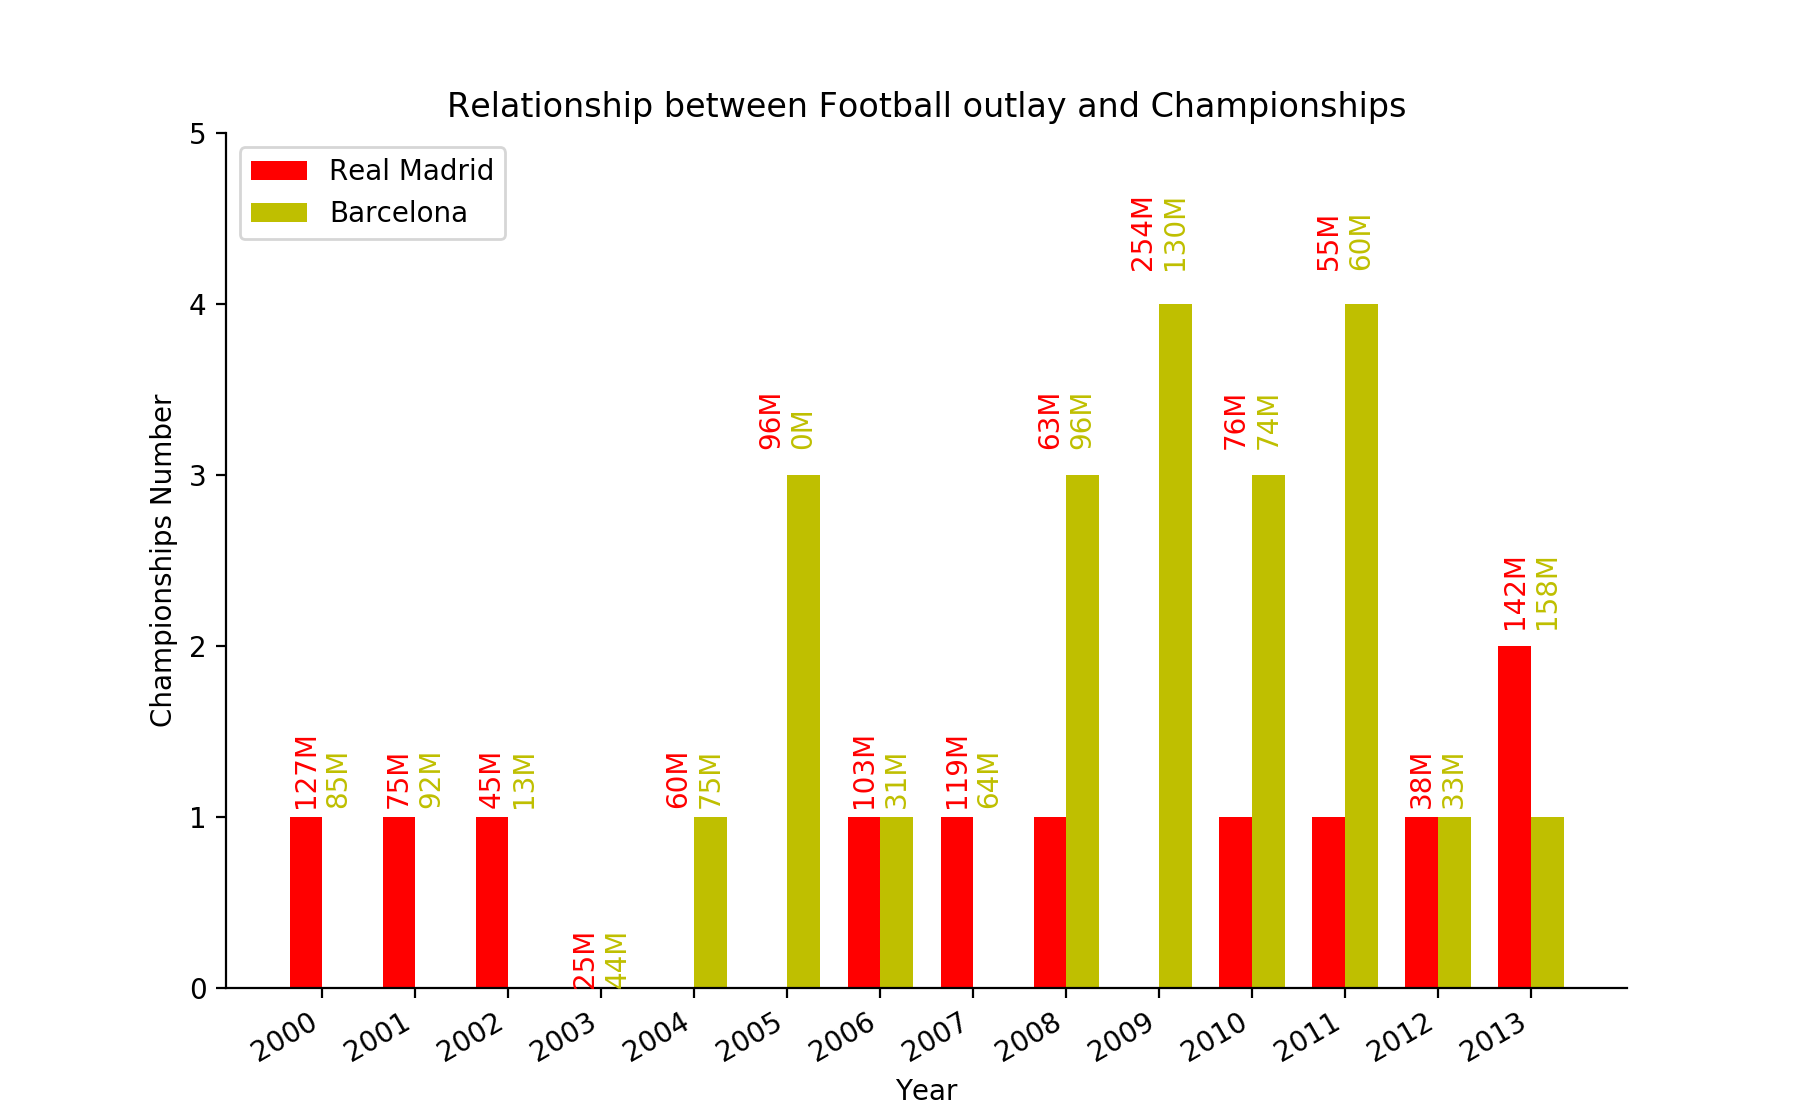

In [3]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

N = final_df.shape[0]
ind = np.arange(N)
width = 0.35

fig, ax = subplots()

rects1 = ax.bar(ind, final_df['Championships_x'], width, color='r')

rects2 = ax.bar(ind + width, final_df['Championships_y'], width, color='y')



ax.set_xticks(ind + width / 2)
ax.set_xticklabels(final_df.index.values)
ax.set_yticks(np.arange(6))

# Rotate X-axis labels
for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment('right')

# add a title
plt.title('Relationship between Football outlay and Championships')

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels
ax.set_ylabel('Championships Number')
ax.set_xlabel('Year')

ax.legend(["Real Madrid", "Barcelona"], loc=2);


In [4]:
def autolabel(rects1, chams1, outs1, rects2, chams2, outs2):
    """Attach a text label above each bar displaying its height
    """
    for rect1, cham1, out1, rect2, cham2, out2 in zip(rects1, chams1, outs1, rects2, chams2, outs2):
        height1 = cham1
        height2 = cham2
        height = height1 if height1 > height2 else height2
        ax.text(rect1.get_x() + rect1.get_width()/2., 1.05*height,
                '%dM' % int(out1), ha='center', va='bottom', rotation=90, color='r')
        ax.text(rect2.get_x() + rect2.get_width()/2., 1.05*height,
                '%dM' % int(out2), ha='center', va='bottom', rotation=90, color='y')


autolabel(rects1, final_df['Championships_x'], final_df['Inversion (M)_x'],
          rects2, final_df['Championships_y'], final_df['Inversion (M)_y'])

plt.show()
